https://www.latlong.net/category/cities-243-15.html

https://aa.usno.navy.mil/data/RS_OneYear

In [ ]:
# Manage data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Help convert a string "0630" into float hour like 6.5
def convert_to_hour(ele):
    hours = ele[:2]
    minutes = ele[2:]
    return float(hours) + float(minutes)/60

# Variables
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
path0 = "./data_sr.txt"
path1 = "./data_sr_50.txt"
path2 = "./data_sr_minus50.txt"

# Read file
with open(path0, "r") as fr:
    lines = fr.readlines()

# Only choose the data we need
data = lines[9:-2]

# Divide each line into tabular
for i in range(len(data)):
    # Everything is good and normal with 0-28 (or day 1st to day 29th)
    if i <= 28:
        data[i] = data[i].strip("\n").split("  ")[1:]

    # Else, we have NaN
    elif i > 28:
        data[i] = data[i].strip("\n").split("  ")[1:]
        count = 0
        j = 0
        while j < len(data[i]):
            if len(data[i][j]) > 1:
                count = 0
            elif count == 0:
                data[i][j] = "nan"
                count += 1
            else:
                data[i].remove(data[i][j])
                j -= 1
            j += 1

# Delete data with form " 0601 1807"
for datum in data:
    for i in range(len(datum)):
        datum[i] = datum[i].strip(" ")

for datum in data:
  print(datum)

for datum in data: # every row
    for i in range(len(datum)): # every element
        if datum[i] != "nan":
            datum[i] = datum[i].split()
            datum[i] = convert_to_hour(datum[i][1]) - convert_to_hour(datum[i][0])

for i in range(len(data)):
    for j in range(len(data[i])):
        if data[i][j] == "nan":
            data[i][j] = np.nan

df = pd.DataFrame(data, columns = months)

df

['0611 1742', '0617 1757', '0608 1803', '0550 1804', '0535 1806', '0530 1813', '0535 1820', '0542 1817', '0544 1803', '0542 1744', '0545 1729', '0556 1729']
['0612 1742', '0617 1757', '0607 1803', '0550 1804', '0535 1806', '0530 1813', '0535 1820', '0542 1817', '0544 1802', '0542 1743', '0545 1729', '0557 1729']
['0612 1743', '0617 1758', '0607 1804', '0549 1804', '0534 1806', '0530 1813', '0535 1820', '0542 1817', '0544 1801', '0542 1742', '0545 1728', '0557 1729']
['0612 1743', '0616 1758', '0606 1804', '0548 1804', '0534 1806', '0530 1813', '0536 1820', '0542 1816', '0544 1801', '0542 1742', '0545 1728', '0558 1729']
['0613 1744', '0616 1758', '0606 1804', '0548 1804', '0534 1806', '0530 1814', '0536 1820', '0543 1816', '0543 1800', '0542 1741', '0546 1728', '0558 1730']
['0613 1745', '0616 1759', '0605 1804', '0547 1804', '0533 1807', '0530 1814', '0536 1820', '0543 1816', '0543 1800', '0542 1741', '0546 1728', '0559 1730']
['0613 1745', '0616 1759', '0605 1804', '0547 1804', '0533

,January,February,March,April,May,June,July,August,September,October,November,December
0,11.516667,11.666667,11.916667,12.233333,12.516667,12.716667,12.750000,12.583333,12.316667,12.033333,11.733333,11.550000
1,11.500000,11.666667,11.933333,12.233333,12.516667,12.716667,12.750000,12.583333,12.300000,12.016667,11.733333,11.533333
2,11.516667,11.683333,11.950000,12.250000,12.533333,12.716667,12.750000,12.583333,12.283333,12.000000,11.716667,11.533333
3,11.516667,11.700000,11.966667,12.266667,12.533333,12.716667,12.733333,12.566667,12.283333,12.000000,11.716667,11.516667
4,11.516667,11.700000,11.966667,12.266667,12.533333,12.733333,12.733333,12.550000,12.283333,11.983333,11.700000,11.533333
5,11.533333,11.716667,11.983333,12.283333,12.566667,12.733333,12.733333,12.550000,12.283333,11.983333,11.700000,11.516667
6,11.533333,11.716667,11.983333,12.283333,12.566667,12.733333,12.733333,12.533333,12.266667,11.966667,11.700000,11.516667
7,11.533333,11.716667,12.000000,12.300000,12.566667,12.750000,12.716667,12.533333,12.250000,11.950000,11.666667,11.516667
8,11.533333,11.733333,12.000000,12.300000,12.566667,12.750000,12.716667,12.516667,12.250000,11.950000,11.666667,11.516667
9,11.550000,11.750000,12.016667,12.316667,12.583333,12.733333,12.716667,12.516667,12.233333,11.933333,11.666667,11.500000


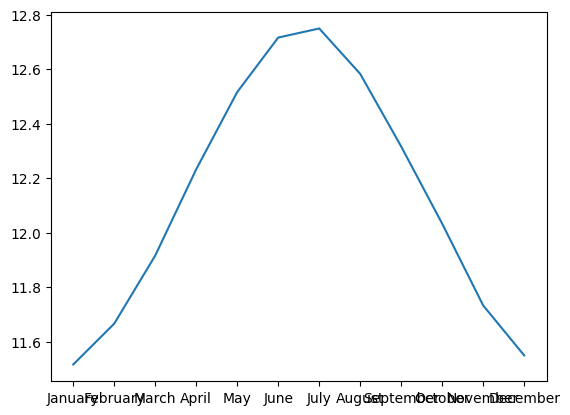

In [ ]:
# Print the first day of month
plt.plot(df.iloc[0])
plt.show()

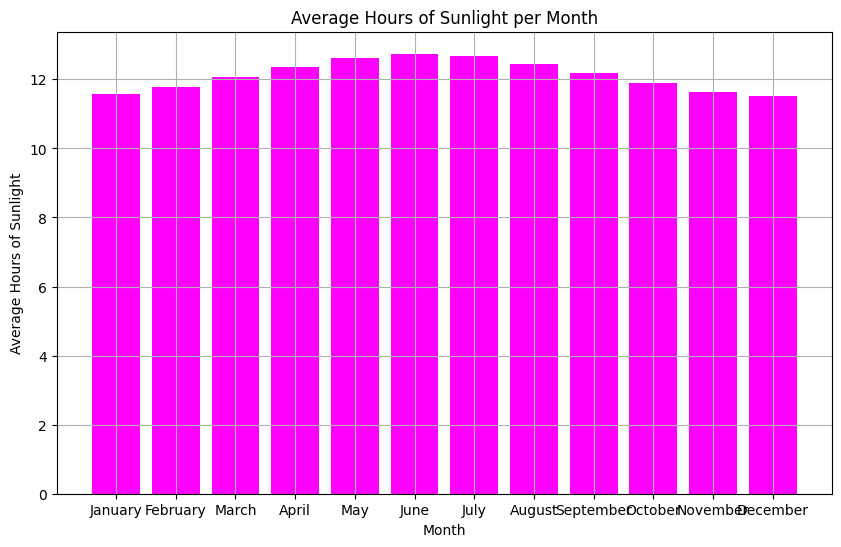

In [ ]:
# prompt: Code a program to plot the average hours of sunlight in each month using the df

# Calculate the average sunlight hours for each month
average_sunlight = df.mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(months, average_sunlight, facecolor = "magenta")
plt.xlabel("Month")
plt.ylabel("Average Hours of Sunlight")
plt.title("Average Hours of Sunlight per Month")
plt.grid(True)
plt.show()

In [ ]:
# Import numpy
import numpy as np

# Create a list (must be MxN list)
arr = [[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]

# Create an array from list
numpy_arr = np.array(arr)

numpy_arr

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# rows: index 1, column: all
numpy_arr[1, :]

array([4, 5, 6])

In [ ]:
# rows: all, column: index 1
numpy_arr[:, 1]

array([2, 5, 8])

In [ ]:
# Create a MxN company
class Company:
    """
    Attributes:
    C : m-by-n
    I : m-by-n
    TV : total

    cost array [float]
    inventory array [float]
    """
    def __init__(self, inventory, cost):
        self.i = inventory
        self.c = cost
        (m,n) = inventory.shape
        TV = 0
        for k in range(m):
            for j in range(n):
                TV += inventory[k,j]*cost[k,j]

        self.TV = TV

    def Order(self,PO):
        """
        Returns an m-by-1 array that
        houses how much
        each factory to

        it costs
        fill the PO.

        PreC: self is a Company object
        representing m factories

        PO is

        and n

        products.
        purchase
        """
        C = self.C
        (m,n) = C.shape
        theCosts = np.zeros((m,1))
        for k in range(m):
            for j in range(n):
                theCosts[k] += C[k,j]*PO[j]
        return theCosts

    def CanDo(self,PO):
        """
        Return the indices of those
        factories with sufficient
        inventory.

        PreC: PO is a purchase order array.
        """
        I = self.I
        (m,n) = I.shape
        Who = []
        for k in range(m):
            if all( I[k,:] >= PO):
                Who.append(k)
        return np.array(Who)